In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape)
print(df_test.shape)

(27486, 4)
(3535, 3)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27486 entries, 0 to 27485
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27486 non-null  object
 1   text           27485 non-null  object
 2   selected_text  27485 non-null  object
 3   sentiment      27486 non-null  object
dtypes: object(4)
memory usage: 859.1+ KB


In [4]:
df_train.dropna(inplace=True)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3535 non-null   object
 1   text       3535 non-null   object
 2   sentiment  3535 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


## EDA

In [6]:
df_train.head()

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,Spent the entire morning in a meeting w/ a ven...,my boss was not happy w/ them. Lots of fun.,neutral
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! h...,says good (or should i say bad?) afternoon!,neutral
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive


In [7]:
df_train.describe()

,textID,text,selected_text,sentiment
count,27485,27485,27485,27485
unique,27485,27485,22579,3
top,6b6ab66504,_ i know ! my BG looks emo now .! lol,good,neutral
freq,1,1,195,11117


In [8]:
temp = df_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)  
temp

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7786


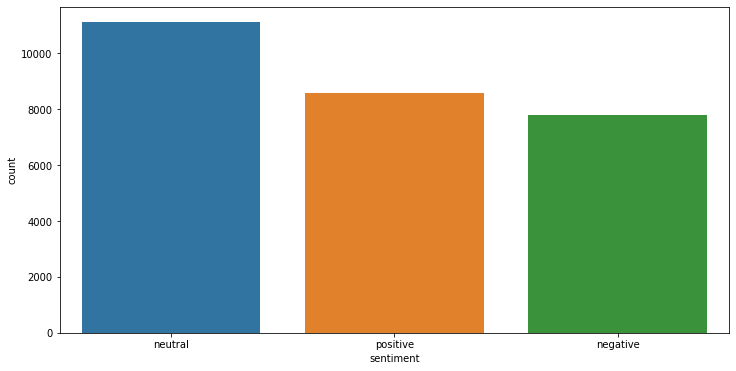

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=df_train)

In [10]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    
    return float(len(c))/len(a) + len(b) - len(c)

In [11]:
results_jaccard = []

for ind, row in df_train.iterrows():
    sent1 = row.text
    sent2 = row.selected_text
    
    jaccard_score = jaccard(sent1, sent2)
    results_jaccard.append([sent1, sent2, jaccard_score])

In [13]:
df_jaccard = pd.DataFrame(results_jaccard, columns=['text', 'selected_text', 'jaccard_score'])
df_train = df_train.merge(df_jaccard, how='outer')

In [15]:
# Number of words in selected text
df_train['Num_words_ST'] = df_train['selected_text'].apply(lambda x:len(str(x).split()))

# Number of words in text
df_train['Num_words_Text'] = df_train['text'].apply(lambda x:len(str(x).split()))

# Difference in number of words in text and selected text
df_train['difference_in_words'] = df_train['Num_words_Text'] - df_train['Num_words_ST']

In [16]:
df_train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_words_Text,difference_in_words
0,a3d0a7d5ad,Spent the entire morning in a meeting w/ a ven...,my boss was not happy w/ them. Lots of fun.,neutral,0.416667,10,28,18
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive,0.111111,1,9,8
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! h...,says good (or should i say bad?) afternoon!,neutral,0.888889,8,9,1
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative,0.875000,7,9,2
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive,0.166667,1,6,5
